## Framework for simple regession models

#### Marshall Cyrus

##### Imports

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline



import matplotlib.pyplot as plt
import seaborn as sns

#### Read in all processed data (experimenting)

In [81]:
filepath = '../../processed_data/all_merged.csv'
all_enviro = pd.read_csv(filepath)

In [82]:
all_enviro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25444 entries, 0 to 25443
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   zip                          25444 non-null  int64  
 1   total population             25444 non-null  int64  
 2   ozone                        25333 non-null  float64
 3   ozone pctl                   25333 non-null  float64
 4   pm2.5                        25286 non-null  float64
 5   pm2.5 pctl                   25286 non-null  float64
 6   diesel pm                    25444 non-null  float64
 7   diesel pm pctl               25444 non-null  float64
 8   pesticides                   25444 non-null  float64
 9   pesticides pctl              25444 non-null  float64
 10  traffic                      25353 non-null  float64
 11  traffic pctl                 25353 non-null  float64
 12  cleanup sites                25444 non-null  float64
 13  cleanup sites pc

## Focusing on columns to test

In [20]:
columns_focus =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

In [21]:
all_enviro_fix = all_enviro[columns_focus].fillna(all_enviro[columns_focus].median())

<AxesSubplot:>

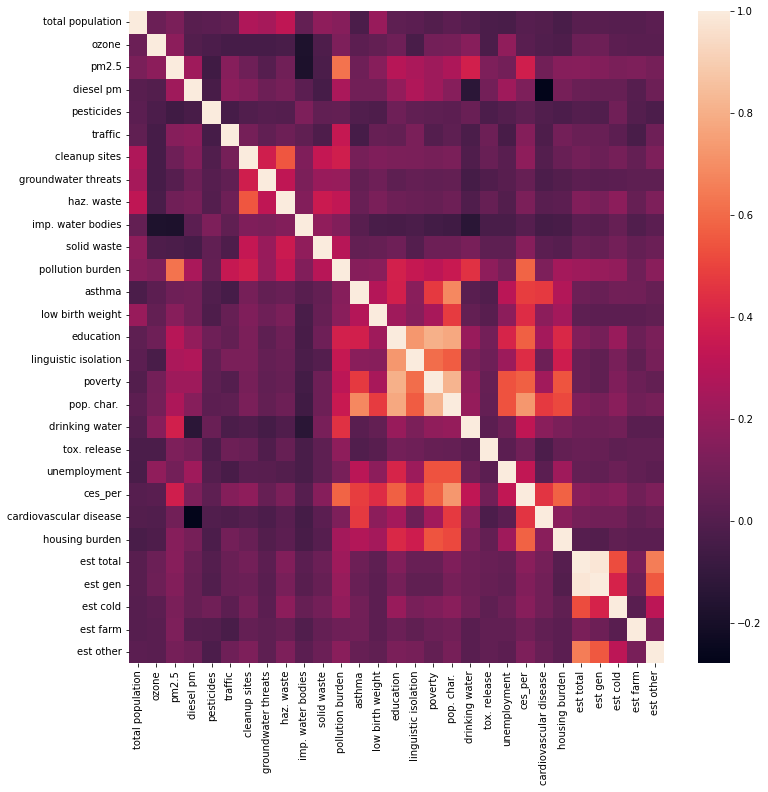

In [25]:
correlations = all_enviro_fix.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlations)

## SVR model with scaling

#### Features for asthma

In [20]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [21]:
X=pd.get_dummies(X)
X=X.fillna(X.median())
y=pd.get_dummies(y)
y=y.fillna(y.median())

### Scaling for SVR

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [23]:
from sklearn.svm import SVR

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
## RBF kernal SVR. 

In [30]:
# kernal = RBF
svr = SVR(kernel='RBF')
svr.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (20355, 12446) instead.

In [ ]:
print(f'Train accuracy {svr.score(X_train,y_train)}')
print(f'Test accuracy {svr.score(X_test,y_test)}')

## ElasticNet Regression

In [83]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [84]:
#X=pd.get_dummies(X)
X=X.fillna(X.median())
# y=pd.get_dummies(y)
y=y.fillna(y.median())
#y=y.astype(int)

In [85]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import plot_confusion_matrix

In [86]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [87]:
elas = ElasticNet(alpha=.1).fit(X_train, y_train)

In [88]:
print(f'Train accuracy {elas.score(X_train,y_train)}')
print(f'Test accuracy {elas.score(X_test,y_test)}')

Train accuracy 0.9999999793025619
Test accuracy 0.9999999790531198


In [ ]:
## Lasso

## Random forest regressor best params 

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

In [49]:
X = all_enviro[['total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']]
y = all_enviro['asthma']

In [51]:
X=X.fillna(X.median())

In [53]:
y=y.fillna(y.median())

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [48]:
# grid search
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
#rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)